# Game 63: Entropy Reduction Visualization

This notebook simulates the entropy reduction in the Game 63 scenario, where the goal is to identify one item among 63 possible outcomes through iterative yes/no questions. Each question ideally halves the possibilities, reducing entropy. We model this as a computational process akin to Lambda Calculus state reduction and visualize the entropy decrease over steps.

## Problem Setup
- **Outcomes**: 63 possible items (e.g., guessing a number from 1 to 63).
- **Queries**: Yes/No questions, each providing approximately 1 bit of information by halving the possibilities.
- **Goal**: Reduce entropy from log₂(63) ≈ 5.977 bits to 0 in about 6 steps.
- **Lambda Calculus Model**: State as a list of possible outcomes, queries as functions filtering the state, entropy as log₂ of remaining outcomes.

We use Python to simulate this reduction process and plot the entropy over steps.

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List

# Initialize the state with 63 possible outcomes
def initialize_state() -> List[int]:
    return list(range(1, 64))  # Numbers 1 to 63

# Calculate entropy of the current state (log2 of number of outcomes)
def calculate_entropy(state: List[int]) -> float:
    if len(state) == 0:
        return 0.0
    return math.log2(len(state))

# Simulate a yes/no query that halves the state (ideally)
def query(state: List[int], condition: str) -> List[int]:
    mid = len(state) // 2
    if condition == 'lower':
        return state[:mid if mid > 0 else 1]
    else:  # 'upper'
        return state[mid if mid > 0 else 0:]

# Display state and entropy at each step
def display_state(state: List[int], step: int):
    print(f'Step {step}:')
    print(f'  Number of possible outcomes: {len(state)}')
    print(f'  Entropy: {calculate_entropy(state):.3f} bits')
    if len(state) <= 5:  # Show details only for small states
        print(f'  Possible outcomes: {state}')
    print()

## Simulation of Game 63 Strategy

We'll simulate a strategy for Game 63 where each yes/no question aims to halve the remaining possibilities:
- Start with 63 outcomes (entropy ≈ 5.977 bits).
- Each query splits the state into roughly equal halves, choosing either the lower or upper half based on the answer.
- For demonstration, we'll assume answers that alternate between 'lower' and 'upper' to show entropy reduction over 6 steps.

This simulates a binary search-like process, reducing the state space with each step.

In [5]:
# Initialize state
state = initialize_state()
display_state(state, 0)

# Store entropy values for plotting
entropies = [calculate_entropy(state)]
states = [state]

# Simulate 6 queries with alternating answers for demonstration
answers = ['lower', 'upper', 'lower', 'upper', 'lower', 'upper']
for step, answer in enumerate(answers, 1):
    state = query(state, answer)
    states.append(state)
    entropies.append(calculate_entropy(state))
    display_state(state, step)
    if len(state) <= 1:
        break

Step 0:
  Number of possible outcomes: 63
  Entropy: 5.977 bits

Step 1:
  Number of possible outcomes: 31
  Entropy: 4.954 bits

Step 2:
  Number of possible outcomes: 16
  Entropy: 4.000 bits

Step 3:
  Number of possible outcomes: 8
  Entropy: 3.000 bits

Step 4:
  Number of possible outcomes: 4
  Entropy: 2.000 bits
  Possible outcomes: [20, 21, 22, 23]

Step 5:
  Number of possible outcomes: 2
  Entropy: 1.000 bits
  Possible outcomes: [20, 21]

Step 6:
  Number of possible outcomes: 1
  Entropy: 0.000 bits
  Possible outcomes: [21]



## Visualization of Entropy Reduction

To visually represent the entropy reduction over the queries, we create a polar plot where:
- The angle (theta) represents the number of queries (0 to 6), scaled to radians (0 to 3π/2).
- The radius (r) represents the entropy $H(state_i) = \log_2(|state_i|)$, decreasing as outcomes are reduced.

This plot illustrates how each query step reduces uncertainty, aligning with the computational model of state reduction.

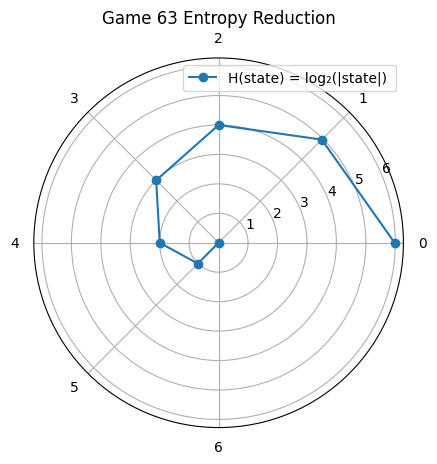

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define theta as number of queries (0 to len(entropies)-1)
steps = np.array(range(len(entropies)))
theta = steps * (np.pi / 2) * (3 / max(steps) if max(steps) > 0 else 1)  # Scale to radians

# Define r as entropy values
r = entropies

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r, 'o-', label='H(state) = log₂(|state|) ')
ax.set_title('Game 63 Entropy Reduction')
ax.set_xticks(theta)
ax.set_xticklabels([str(i) for i in steps])  # Label as query steps
ax.legend()

# Display the plot
plt.show()

# Save the plot
plt.savefig('../images/graphs/game_63_polar_plot.png')